<a href="https://colab.research.google.com/github/OhJunYoung21/artificial-inteliigence/blob/main/Jarvis_tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


f = pd.read_csv('/content/tomato.csv',encoding = 'cp949')

tomato_df = pd.DataFrame(f)

tomato_df

,Name,Rating,Directed By,Runtime,Studio,TOMATOMETER score,TOMATOMETER Count,AUDIENCE score,AUDIENCE count
0,The Angry Birds Movie 2,PG (for rude humor and action),Thurop Van Orman,100,Columbia Pictures,73,107,84,"4,023"
1,Legend Of The Demon Cat (K청kai),NR,Kaige Chen,129,Well Go USA,91,11,37,74
2,Dora and the Lost City of Gold,PG (for action and some impolite humor),James Bobin,102,Paramount Pictures,84,148,88,"6,715"
3,Luce,R (for language throughout sexual content nud...,Julius Onah,109,NEON,91,151,77,284
4,Good Boys,R (for strong crude sexual content drug and a...,Gene Stupnitsky,95,Universal Pictures,80,237,86,"13,007"
...,...,...,...,...,...,...,...,...,...
2095,The Boy And The Beast (Bakemono No Ko),R (for strong combat violence throughout bloo...,Michael Bay,144,Paramount Pictures,51,67,82,"33,491"
2096,The Other Side of the Door,R (for strong sexual content graphic nudity a...,Charlie Kaufman Duke Johnson,96,Starburns Industries,92,37,71,"19,600"
2097,Touched With Fire,R (for violence and language throughout.),Paco Cabezas,90,Circle of Confusion,44,50,55,"6,208"
2098,The Funhouse Massacre,R (for language and some violence/torture),Florian Gallenberger,110,Majestic Filmproduktion,26,14,61,"3,914"


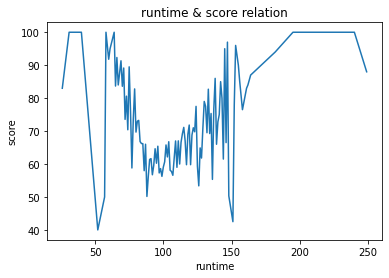

In [3]:
Run_1 = tomato_df.groupby(by='Runtime')


RUN_1 = pd.DataFrame(Run_1['TOMATOMETER score'].mean())

import matplotlib.pyplot as plt


plt.title('runtime & score relation')
plt.xlabel('runtime')
plt.ylabel('score')
plt.plot(RUN_1)
plt.show()


In [4]:
import numpy as np


rate = tomato_df.groupby('Rating')['TOMATOMETER score'].mean()


rate = pd.DataFrame(rate)

num_1 = np.arange(0,len(rate.index),1).tolist()

rate  = pd.DataFrame({'Rating':rate.index,
                      'TOMATOMETER score':rate['TOMATOMETER score']},
                     index = num_1,columns = ['Rating','TOMATOMETER score']
                      )


rate['TOMATOMETER score'] = tomato_df['TOMATOMETER score']

rate

,Rating,TOMATOMETER score
0,G,73
1,NC17,91
2,NR,84
3,NR (for bloody violence language and some sex...,91
4,NR (for bloody violence language throughout a...,80
...,...,...
960,R (for zombie violence/gore and for language),54
961,R (or violence sexual content/nudity and lang...,44
962,R (some violence),93
963,R (strong violence a rape disturbing images a...,82


In [5]:
rating = []


for j in rate['Rating']:
  if ' (' in j:
    new_list = j.split('(')
    rating.append(new_list[0])
  else:
    continue

#rating = rate['Rating'][:3].tolist() + rating


final = rate.iloc[:961,:]


final['Rating'] = ['G','NC17'] + rating

rate_graph =  pd.DataFrame(final.groupby('Rating')['TOMATOMETER score'].mean())

rate_graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,TOMATOMETER score
Rating,
NR,73.142857
PG,63.563025
PG-13,64.591837
R,65.958647
G,73.000000
NC17,91.000000


프로젝트의 목적:
1.score을 예측할 때 사용하는 훈련데이터가 rating,runtime,audience count 등을 사용할 건데 자료형이 object인 경우가 있어서 corr(),시각화에 어려움이 있습니다. 이 문제를 어떻게 해결해야 할까요?


2.예를 들어 영화점수가 런타임도 길고, 배급사나 등급이 ~할 때 제일 좋더라 라는 결론을 얻고 싶습니다. 쉽게 말해서 매개변수가 2개 이상인 경우에는 어떻게 데이터를 전처리해야 하며, 어떤 모델을 써야 하나요?



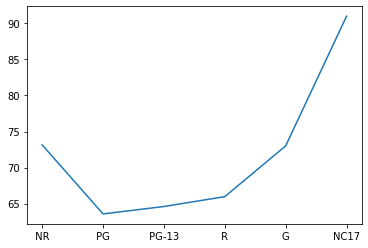

In [6]:
plt.plot(rate_graph)
plt.show()    #각 등급별로 영화의 평점을 그래프로 나타내었다.

In [19]:
tomato_1 = pd.get_dummies(tomato_df)

tomato_1.columns

Index(['Runtime', 'TOMATOMETER score', 'TOMATOMETER Count', 'AUDIENCE score',
       'Name_09월 11일', 'Name_1 Night (One Night)', 'Name_10  Gone',
       'Name_100 Streets', 'Name_10x10', 'Name_11  (11 Minut)',
       ...
       'AUDIENCE count_965', 'AUDIENCE count_97', 'AUDIENCE count_971',
       'AUDIENCE count_973', 'AUDIENCE count_98', 'AUDIENCE count_983',
       'AUDIENCE count_984', 'AUDIENCE count_987', 'AUDIENCE count_99',
       'AUDIENCE count_991'],
      dtype='object', length=7079)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 


score_data = tomato_df['AUDIENCE score']
score_target = tomato_df['TOMATOMETER score']


x_train,x_test,y_train,y_test = train_test_split(score_data,score_target,random_state = 0)


x_train = x_train[:,np.newaxis]

x_test = x_test[:,np.newaxis]    #1차원의 배열로는 학습이 불가능하기 때문에 np.newaxis를 사용해서 차원을 늘려주었습니다.

lin_1 = LinearRegression()
lin_1.fit(x_train,y_train)


score = lin_1.score(x_test,y_test)  #score를 알아봅시다.


print("선형회귀를 사용했을 때의 점수(지도학습):{:.2f}".format(score))  #소수점 2번째 자리까지 출력할 것이다.

선형회귀를 사용했을 때의 점수(지도학습):0.31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
